# On parameterized scientific computing

In [1]:
using OrdinaryDiffEq, Plots, Flux, GalacticOptim

pyplot()

Plots.PyPlotBackend()

In [2]:
function sci_train(loss::Function, θ, opt = ADAM(), adtype = GalacticOptim.AutoZygote(), args...; maxiters = 200::Integer, kwargs...)
    f = GalacticOptim.OptimizationFunction((x, p) -> loss(x), adtype)
    fi = GalacticOptim.instantiate_function(f, θ, adtype, nothing)
    prob = GalacticOptim.OptimizationProblem(fi, θ; kwargs...)
    return GalacticOptim.solve(prob, opt, args...; maxiters = maxiters, kwargs...)
end

sci_train (generic function with 3 methods)

In [3]:
function lotka_volterra(u, p, t)
    🐰, 🦊 = u
    α, β, δ, γ = p
    d🐰 = 🐰 * (α - β * 🦊)
    d🦊 = -🦊 * (γ - δ * 🐰)
    
    return [d🐰, d🦊]
end

lotka_volterra (generic function with 1 method)

In [4]:
u0 = [1.0, 1.0]

2-element Vector{Float64}:
 1.0
 1.0

In [5]:
tspan = (0.0, 10.0)

(0.0, 10.0)

In [10]:
p = (1.5, 1.0, 1.0, 3.0)

(1.5, 1.0, 1.0, 3.0)

In [11]:
prob = ODEProblem(lotka_volterra, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 1.0
 1.0

In [12]:
sol = solve(prob, Midpoint())

retcode: Success
Interpolation: 3rd order Hermite
t: 725-element Vector{Float64}:
  0.0
  0.0016779262355463627
  0.0032066492149561004
  0.006457888530827752
  0.01038666439165586
  0.01601088972930634
  0.022768248065866248
  0.031011969967351696
  0.04043143263576264
  0.05105068559607068
  0.06266588056650954
  0.0751892880301063
  0.08847254561391854
  ⋮
  9.81970808006719
  9.836090308960975
  9.852509554598075
  9.868962999920885
  9.88544834206435
  9.901963764502334
  9.918507902828638
  9.935079809796452
  9.951678917566646
  9.968305003881978
  9.984958158987576
 10.0
u: 725-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [1.0008421316648053, 0.9966504810799005]
 [1.0016148889893124, 0.9936097993677296]
 [1.0032758210922739, 0.9871777167800099]
 [1.0053144988054084, 0.9794679011906717]
 [1.0082930652664543, 0.9685493781194046]
 [1.0119650388734798, 0.9556134736499073]
 [1.0165821698379447, 0.940098185905158]
 [1.0220420492909177, 0.9227221697012322]
 [1.0284321341946914, 0.903

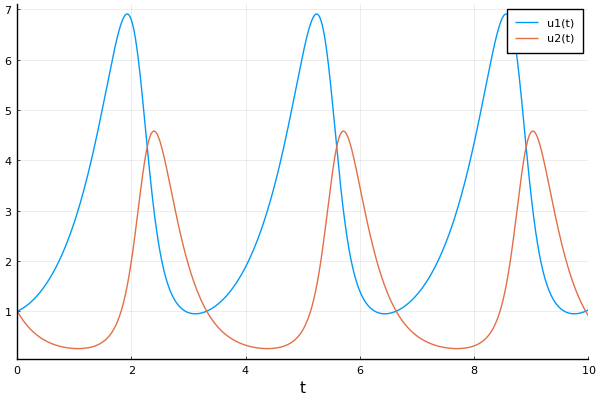

In [13]:
plot(sol)

In [14]:
tsteps = 0.0:0.2:10.0
function loss(p)
    sol = solve(prob, Midpoint(), p=p, saveat = tsteps)
    loss = sum(abs2, sol .- 1)
    return loss, sol
end

loss (generic function with 1 method)

In [15]:
callback = function (p, l, pred)
    display(l)
    plt = plot(pred, ylim = (0, 6))
    display(plt)
    # Tell sciml_train to not halt the optimization. If return true, then
    # optimization stops.
    return false
end

#4 (generic function with 1 method)

In [16]:
res = sci_train(loss, p, opt = ADAM(), cb = callback, maxiters = 100)

LoadError: MethodError: no method matching copy(::NTuple{4, Float64})
[0mClosest candidates are:
[0m  copy([91m::StructArrays.StructArray{T}[39m) where T at /Users/vavrines/.julia/packages/StructArrays/GhBGM/src/structarray.jl:406
[0m  copy([91m::GeometryBasics.Polygon[39m) at /Users/vavrines/.julia/packages/GeometryBasics/pjtu1/src/basic_types.jl:258
[0m  copy([91m::VectorizationBase.AbstractSIMDVector[39m) at /Users/vavrines/.julia/packages/VectorizationBase/H8Vil/src/VectorizationBase.jl:160
[0m  ...

In [17]:
loss(p)

(508.97740743579504, ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, false, NTuple{4, Float64}, ODEFunction{false, typeof(lotka_volterra), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Midpoint, OrdinaryDiffEq.InterpolationData{ODEFunction{false, typeof(lotka_volterra), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Vector{Vector{Float64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}, OrdinaryDiffEq.MidpointConstantCache}, DiffEqBase.DEStats}([[1.0, 1.0], [1.144035423149755, 0.6790818491